In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv("C:\\Users\\acer\\Downloads\\archive (2)\\heart.csv")

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [15]:
df.shape

(1025, 14)

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
#outlayers

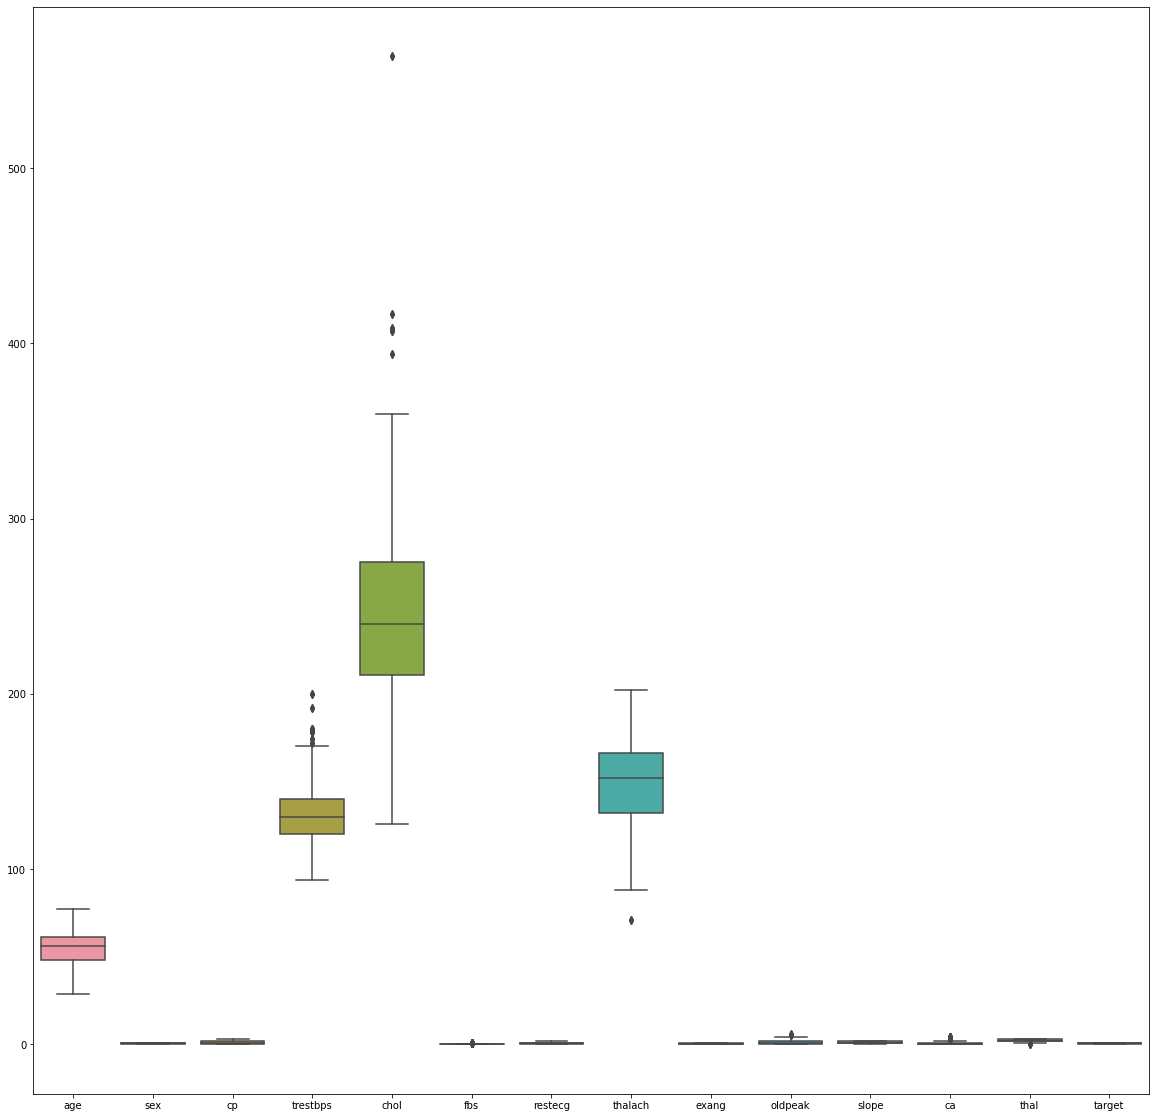

In [18]:
plt.figure(figsize= (20,20))
ax = sns.boxplot(data = df)

In [20]:
#zscore for removing outlayers

In [21]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

           age       sex        cp  trestbps      chol       fbs   restecg  \
0     0.268437  0.661504  0.915755  0.377636  0.659332  0.418878  0.891255   
1     0.158157  0.661504  0.915755  0.479107  0.833861  2.387330  1.004049   
2     1.716595  0.661504  0.915755  0.764688  1.396233  0.418878  0.891255   
3     0.724079  0.661504  0.915755  0.936037  0.833861  0.418878  0.891255   
4     0.834359  1.511706  0.915755  0.364875  0.930822  2.387330  0.891255   
...        ...       ...       ...       ...       ...       ...       ...   
1020  0.503520  0.661504  0.055931  0.479107  0.484803  0.418878  0.891255   
1021  0.613800  0.661504  0.915755  0.377636  0.232705  0.418878  1.004049   
1022  0.819834  0.661504  0.915755  1.234378  0.562371  0.418878  1.004049   
1023  0.488996  1.511706  0.915755  1.234378  0.155137  0.418878  1.004049   
1024  0.047877  0.661504  0.915755  0.663216  1.124743  0.418878  0.891255   

       thalach     exang   oldpeak     slope        ca      tha

In [23]:
threshold = 3
print(np.where(z>3))

(array([ 14,  52,  54,  55,  69,  83, 123, 128, 151, 158, 175, 179, 192,
       208, 242, 246, 267, 290, 294, 296, 319, 326, 329, 340, 348, 359,
       378, 393, 417, 428, 450, 464, 465, 481, 508, 521, 526, 559, 597,
       613, 641, 665, 685, 686, 688, 734, 743, 749, 831, 833, 889, 893,
       958, 970, 993, 996], dtype=int64), array([12, 11,  9,  9,  9, 11,  4, 11,  3,  4,  3,  4,  4, 11, 11,  3,  7,
       11,  3,  7, 12,  3, 12, 11, 11, 12,  7,  9, 11, 11,  4,  4, 11,  4,
        3, 11,  9,  7, 11,  9,  4,  4,  4, 12,  3, 12, 11, 11, 11,  9,  4,
       12,  4, 11, 11,  4], dtype=int64))


In [24]:
Q1= df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [26]:
df = df[(z<3).all(axis = 1)] 
df.shape

(969, 14)

In [30]:
df = df[~((df< (Q1 - 1.5 * IQR))| df > (Q3 + 1.5 * IQR)).any(axis = 1)]
df.shape

(830, 14)

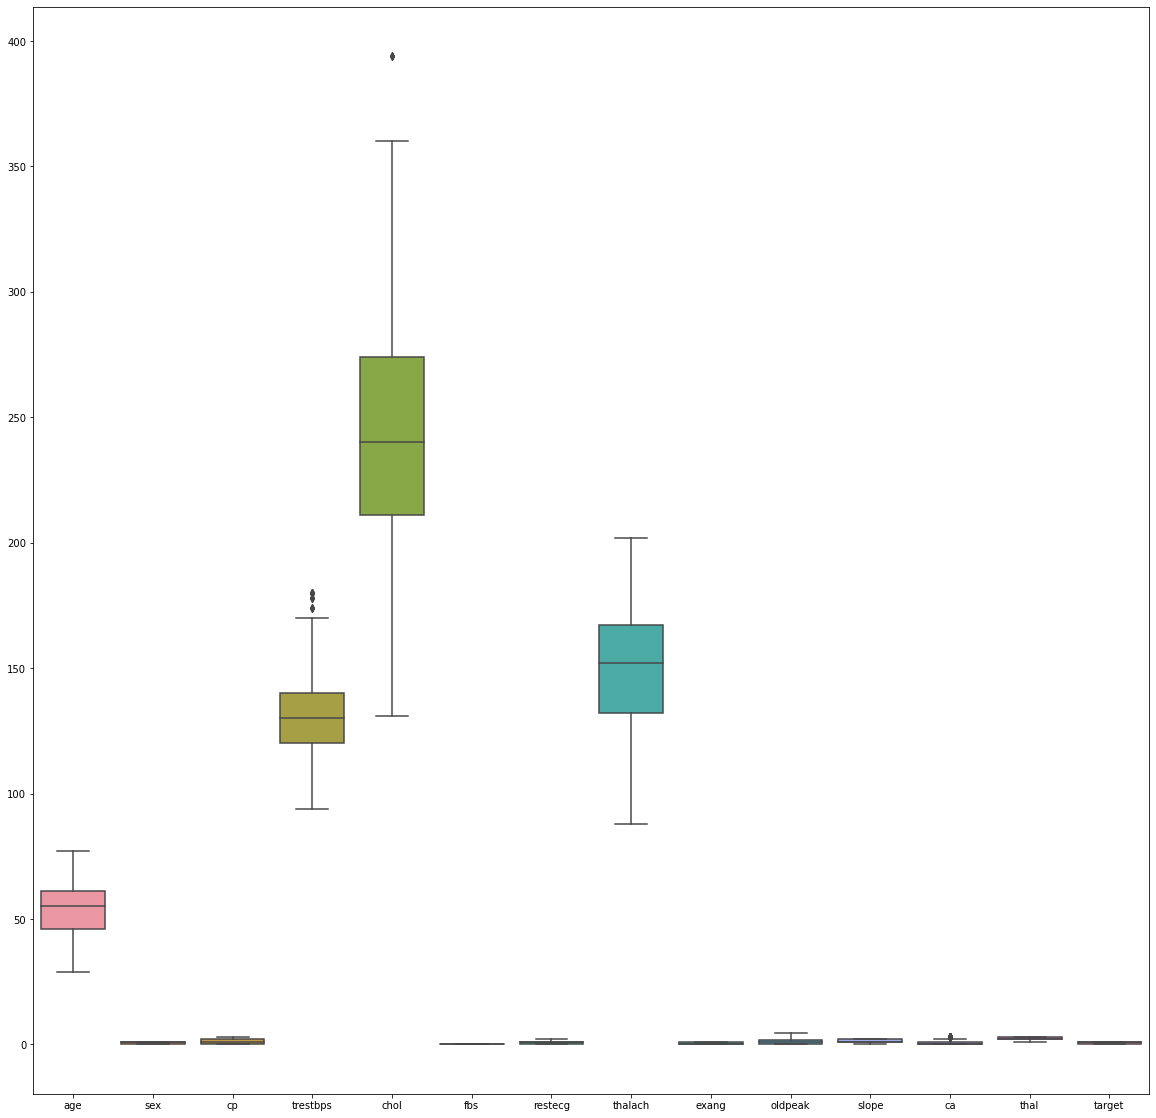

In [31]:
plt.figure(figsize= (20,20))
ax = sns.boxplot(data = df)

In [32]:
# feature selection

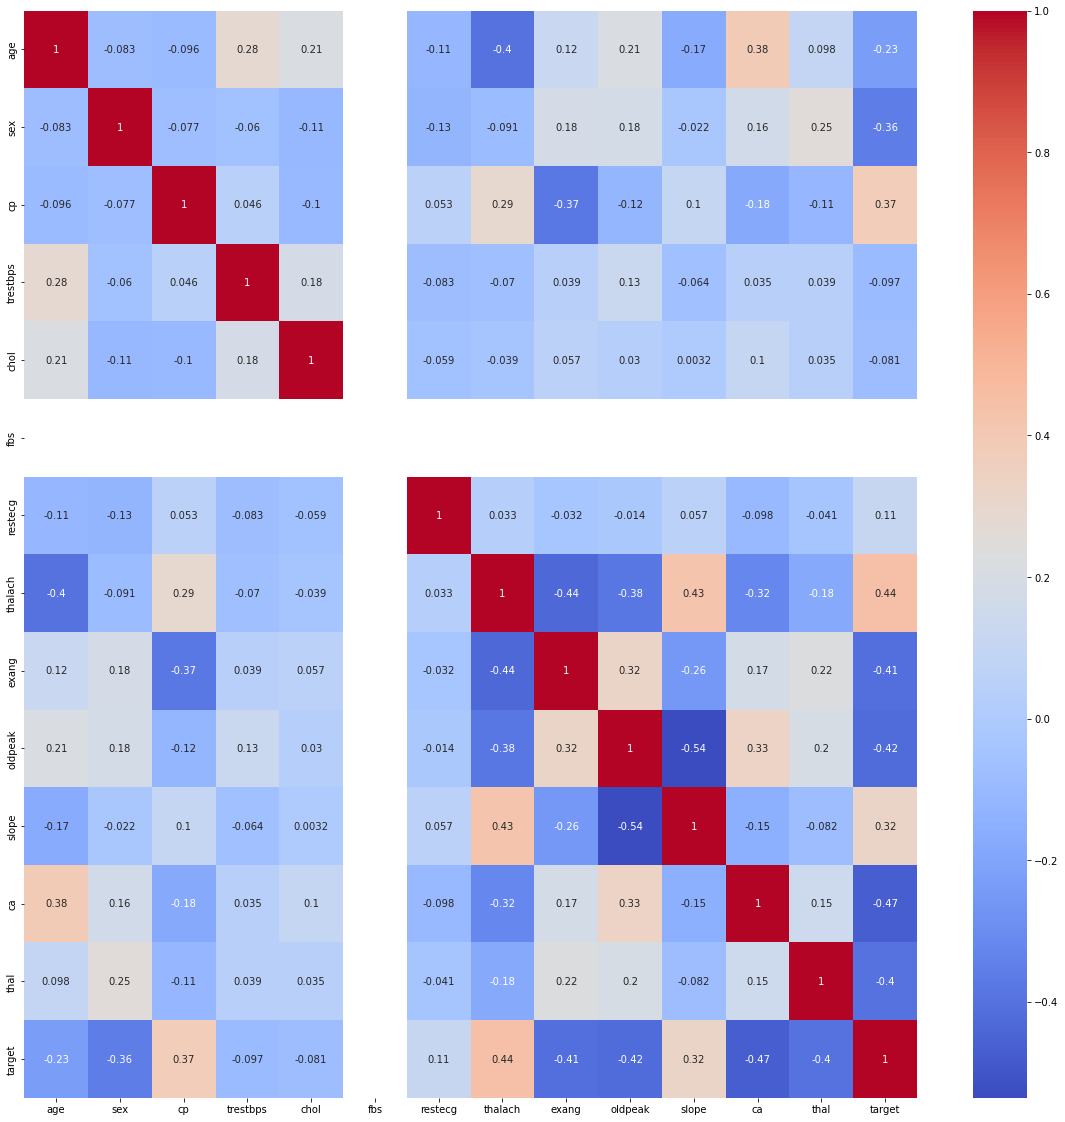

In [34]:
plt.figure(figsize = (20,20))
d = sns.heatmap(df.corr(),cmap = 'coolwarm', annot = True)

In [35]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.0,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,53.924096,0.693976,0.904819,129.828916,244.221687,0.0,0.553012,149.392771,0.334940,1.032048,1.409639,0.621687,2.330120,0.522892
std,9.312962,0.461118,1.019402,16.399554,46.346693,0.0,0.532613,22.636903,0.472254,1.106482,0.594225,0.889023,0.576528,0.499777
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.0,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.0,1.000000,167.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,0.0,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


In [36]:
# feature scaling

In [43]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
dataset = pd.get_dummies(df, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])#creating dummy variable
columns_to_scale = ['age' , 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = StandardScaler.fit_transform(dataset[columns_to_scale])


In [45]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,-0.206729,-0.294632,-0.695651,0.822482,-0.028981,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
2,1.727227,0.925649,-1.516053,-1.078216,1.417914,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0.760249,1.108691,-0.889957,0.513066,-0.933291,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
5,0.437923,-1.819983,0.081572,-1.210823,-0.028981,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6,0.437923,-0.965786,1.592839,-0.415182,3.045672,0,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0


In [46]:
dataset.tail()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
1020,0.545365,0.620579,-0.501345,0.645673,-0.933291,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
1021,0.652807,-0.294632,0.297467,-0.370980,1.598776,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
1022,-0.743939,-1.209842,0.664489,-1.387632,-0.028981,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
1023,-0.421613,-1.209842,0.211109,0.424662,-0.933291,1,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1024,0.008155,-0.599702,-1.213799,-1.608644,0.332742,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1


In [47]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
count,8.300000e+02,8.300000e+02,8.300000e+02,8.300000e+02,8.300000e+02,830.000000,830.000000,830.000000,830.000000,830.000000,...,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,-3.125533e-16,-7.849143e-16,-6.875357e-17,3.686475e-16,1.460010e-16,0.522892,0.306024,0.693976,0.497590,0.173494,...,0.055422,0.479518,0.465060,0.601205,0.230120,0.114458,0.054217,0.055422,0.559036,0.385542
std,1.000603e+00,1.000603e+00,1.000603e+00,1.000603e+00,1.000603e+00,0.499777,0.461118,0.461118,0.500296,0.378902,...,0.228939,0.499882,0.499078,0.489946,0.421164,0.318558,0.226582,0.228939,0.496802,0.487017
min,-2.677894e+00,-2.186067e+00,-2.444402e+00,-2.713701e+00,-9.332913e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.513805e-01,-5.997018e-01,-7.172403e-01,-7.688003e-01,-9.332913e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.155972e-01,1.043855e-02,-9.114420e-02,1.152455e-01,-2.098435e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.602490e-01,6.205789e-01,6.428996e-01,7.782798e-01,6.944664e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.479320e+00,3.061140e+00,3.233642e+00,2.325360e+00,3.045672e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# Visualization

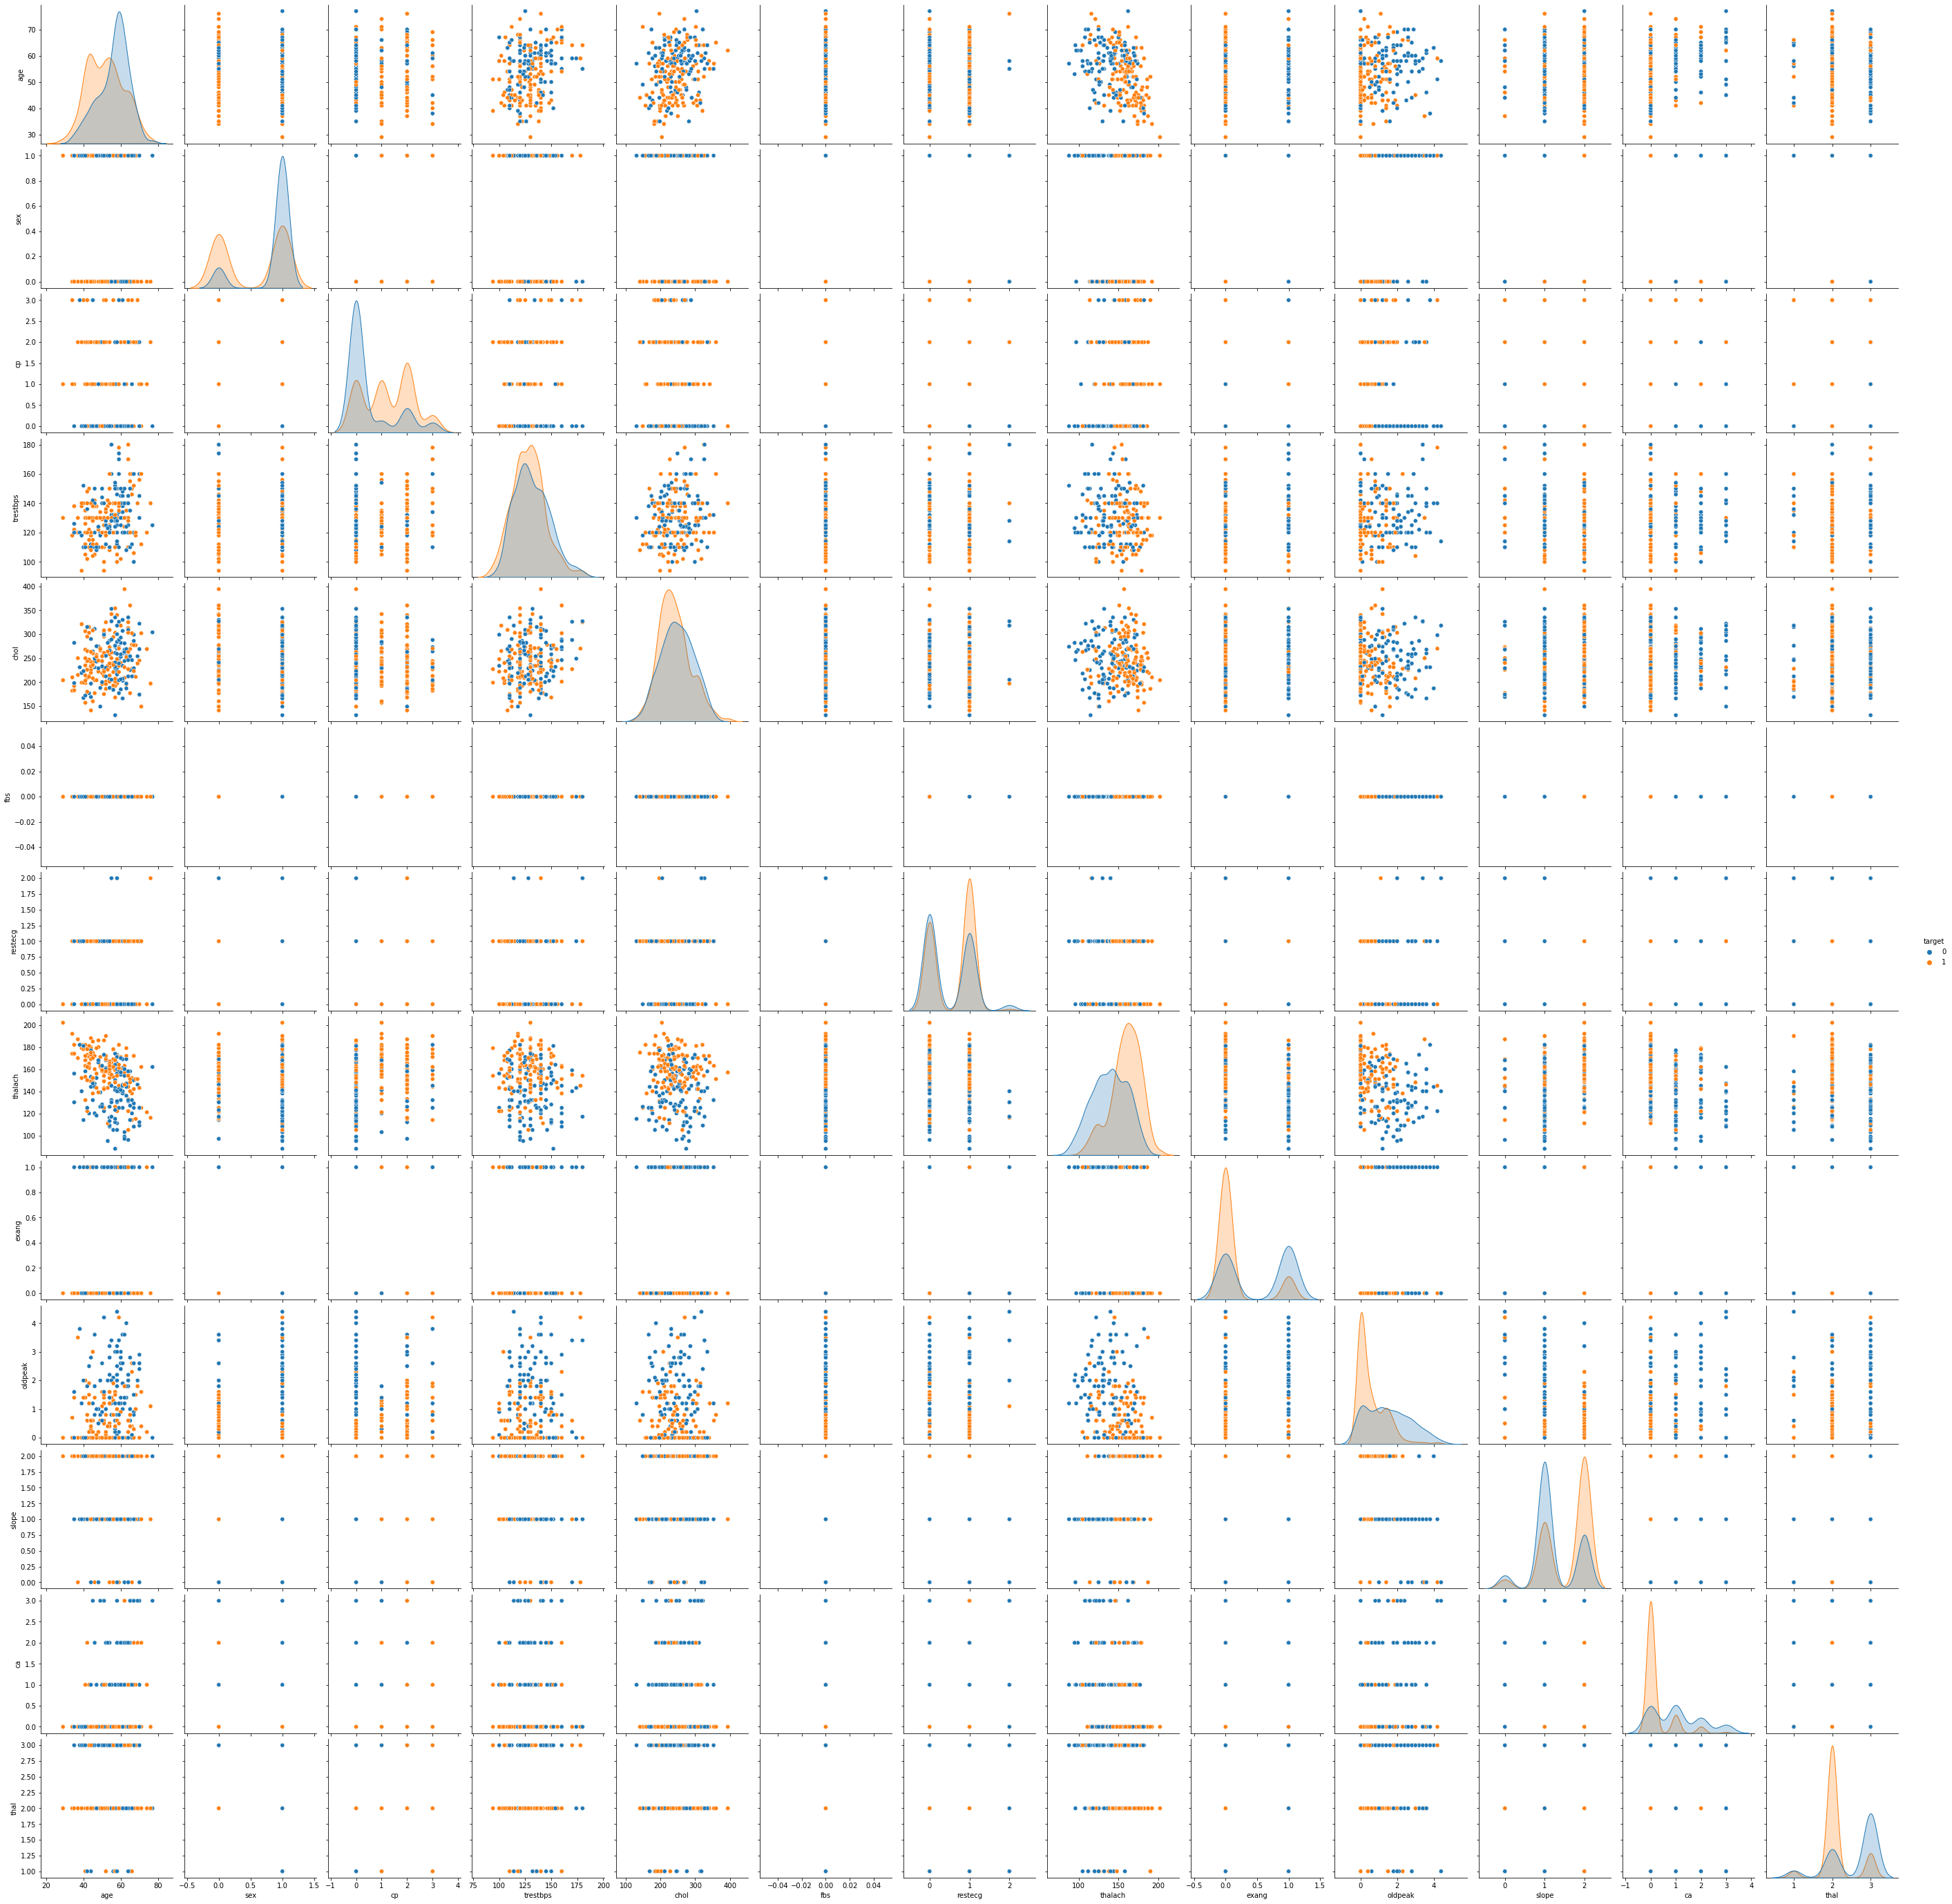

In [54]:
sns.pairplot(df, hue = "target", height = 3, aspect = 1);

<AxesSubplot:>

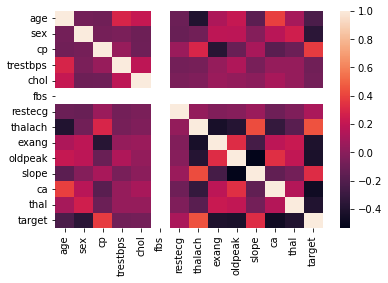

In [55]:
sns.heatmap(df.corr())

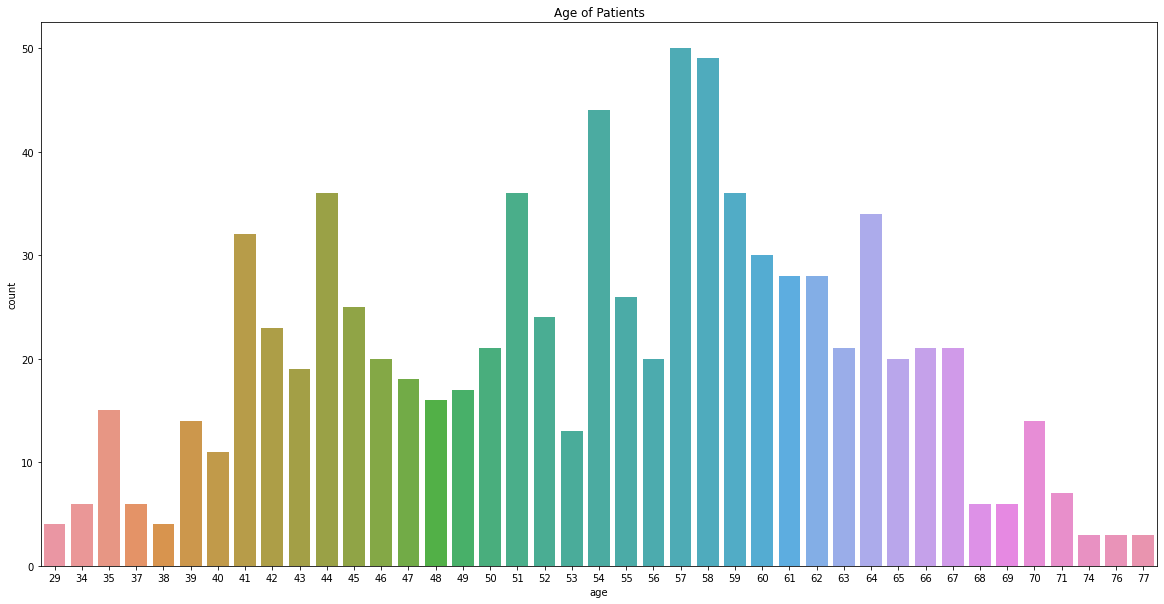

In [56]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df);

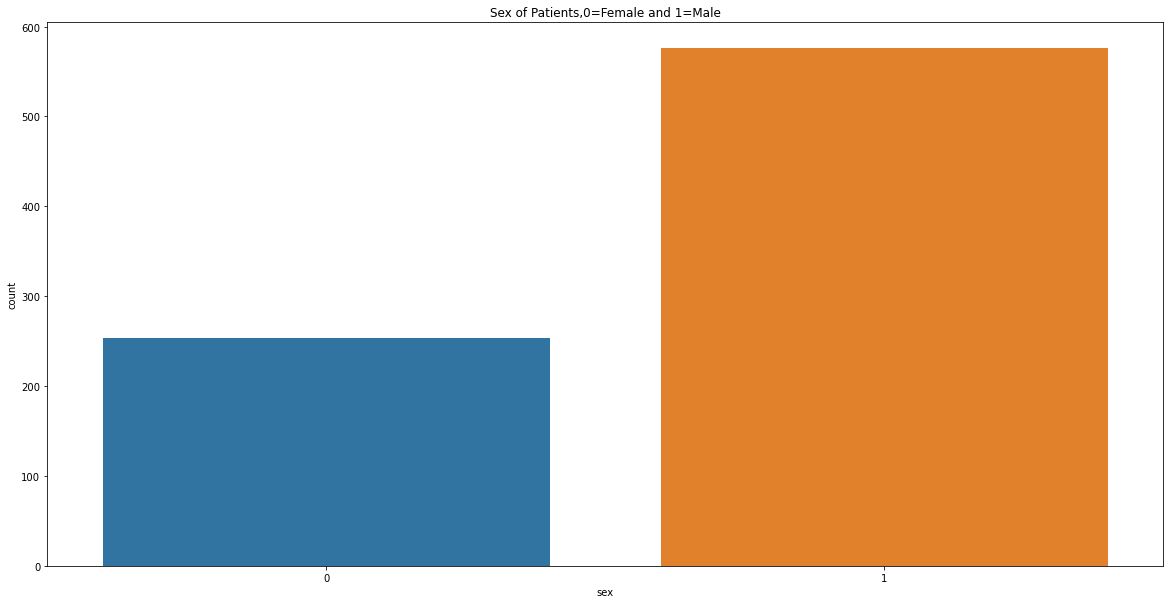

In [57]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df);

In [58]:
cp_data= df['cp'].value_counts().reset_index()
cp_data['index'][3]= 'asymptomatic'
cp_data['index'][2]= 'non-anginal'
cp_data['index'][1]= 'Atyppical Anigma'
cp_data['index'][0]= 'Typical Anigma'
cp_data


,index,cp
0,Typical Anigma,413
1,Atyppical Anigma,212
2,non-anginal,144
3,asymptomatic,61


<AxesSubplot:title={'center':'Chest Pain of Patients'}, xlabel='index', ylabel='cp'>

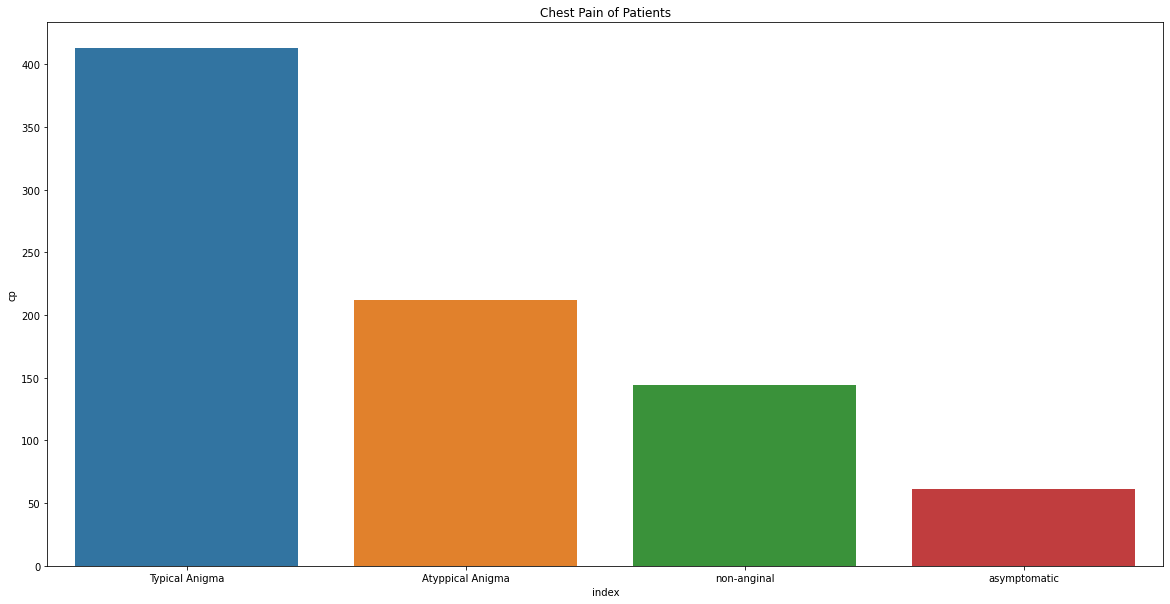

In [59]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")

sns.barplot(x=cp_data['index'],y= cp_data['cp'])

In [60]:
ecg_data= df['restecg'].value_counts().reset_index()
ecg_data['index'][0]= 'normal'
ecg_data['index'][1]= 'having ST-T wave abnormality'
ecg_data['index'][2]= 'showing probable or definite left ventricular hypertrophy by Estes'

ecg_data

,index,restecg
0,normal,429
1,having ST-T wave abnormality,386
2,showing probable or definite left ventricular ...,15


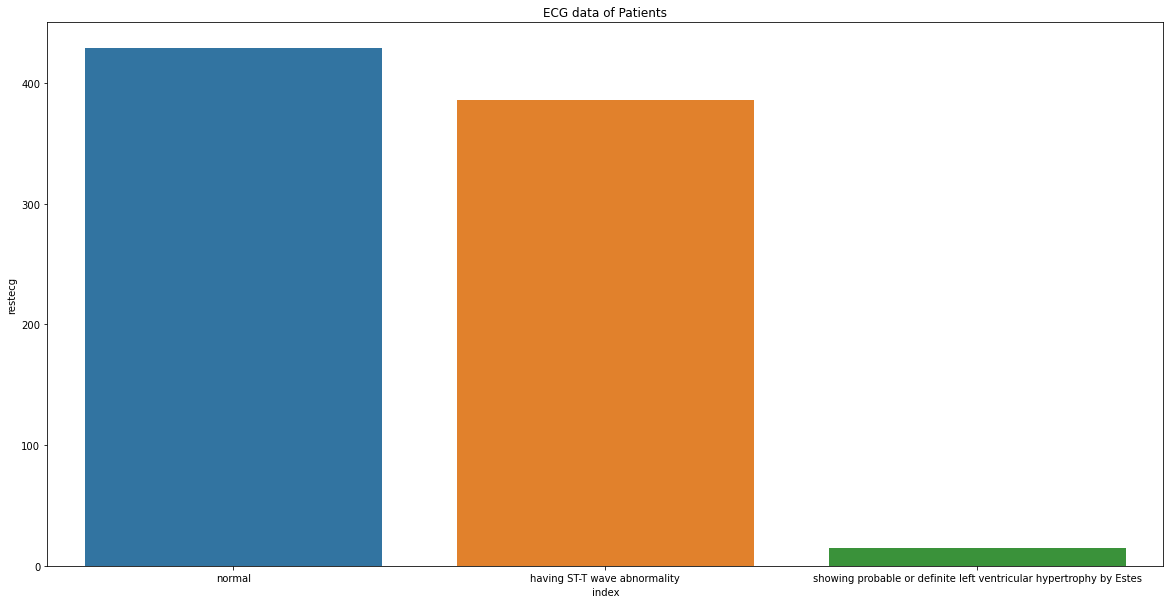

In [61]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")

sns.barplot(x=ecg_data['index'],y= ecg_data['restecg']);

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

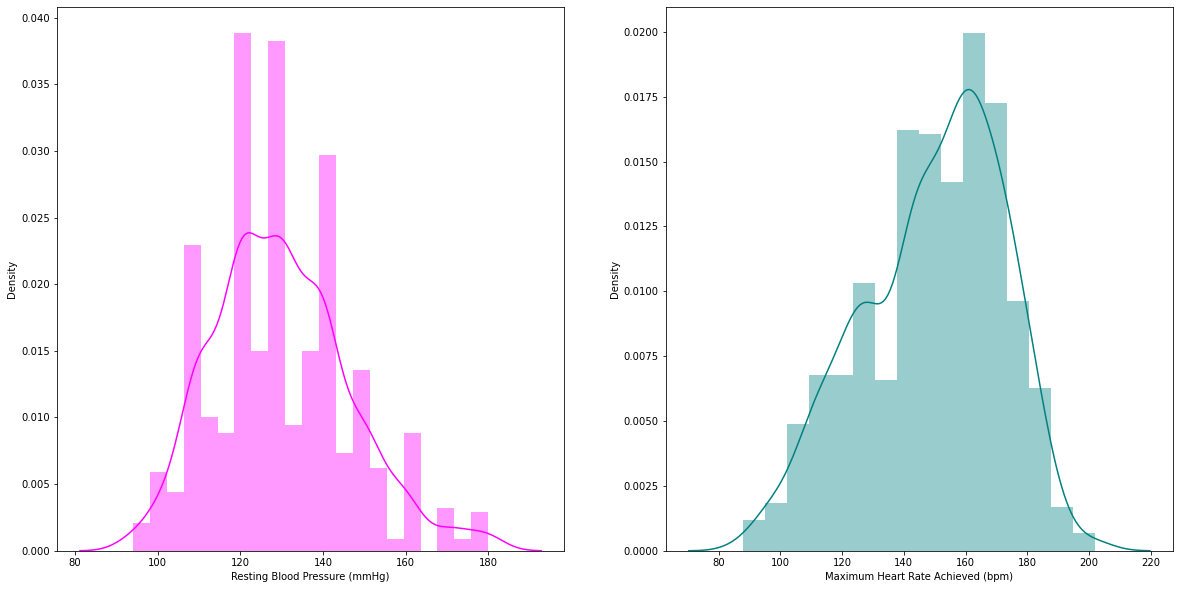

In [62]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trestbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalach'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Cholestrol')

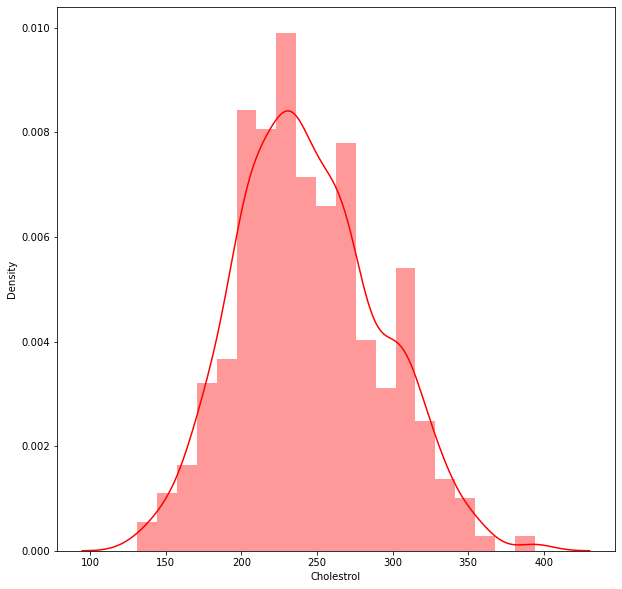

In [63]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

In [64]:
from sklearn.preprocessing import StandardScaler
df_train = df.drop('target', axis =1)
scale=StandardScaler()
scale.fit(df_train)
df_train= scale.transform(df_train)
X=pd.DataFrame(df_train,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.206729,0.664057,-0.888133,-0.294632,-0.695651,0.0,0.839743,0.822482,-0.709664,-0.028981,0.994097,1.551304,1.162620
1,1.727227,0.664057,-0.888133,0.925649,-1.516053,0.0,0.839743,-1.078216,1.409117,1.417914,-2.373660,-0.699714,1.162620
2,0.760249,0.664057,-0.888133,1.108691,-0.889957,0.0,0.839743,0.513066,-0.709664,-0.933291,0.994097,0.425795,1.162620
3,0.437923,-1.505894,-0.888133,-1.819983,0.081572,0.0,-1.038927,-1.210823,-0.709664,-0.028981,-0.689781,-0.699714,-0.572946
4,0.437923,0.664057,-0.888133,-0.965786,1.592839,0.0,2.718412,-0.415182,-0.709664,3.045672,-2.373660,2.676813,-2.308512


In [66]:
from sklearn.model_selection import train_test_split
y= df.iloc[:,-1:]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test,Y_pred1 )
lr_acc_score = accuracy_score(y_test, Y_pred1)
print(lr_acc_score*100,"%")
lr_conf_matrix

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


86.34538152610442 %


array([[ 98,  21],
       [ 13, 117]], dtype=int64)

In [68]:
y = dataset['target']
x = dataset.drop(['target'], axis = 1)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.2, random_state = 5)

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [75]:
#k nearest neighbors classfiers

In [78]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train, y_train)
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(x_test)
accuracy_score(y_test, y_pred_knn)

0.8554216867469879

In [79]:
score.mean()

0.84640434192673

In [81]:
knn_classifier  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=5, p=1,
 weights='uniform')
knn_classifier.fit(x_train, y_train)
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(x_test)
accuracy_score(y_test, y_pred_knn)


0.8734939759036144

In [82]:
score.mean()

0.849366802351877

In [84]:
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
score.mean()

0.849366802351877

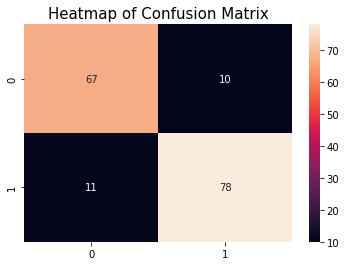

In [85]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [86]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.89      0.88      0.88        89

    accuracy                           0.87       166
   macro avg       0.87      0.87      0.87       166
weighted avg       0.87      0.87      0.87       166



In [88]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_score(y_test, y_pred_rf)

1.0

In [90]:
score=cross_val_score(rf_classifier,x_train,y_train,cv=10)
score.mean()

0.9894617819990955

In [111]:
print(classification_report(y_test, y_pred_knn))

# XGBoost Classifier

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.89      0.88      0.88        89

    accuracy                           0.87       166
   macro avg       0.87      0.87      0.87       166
weighted avg       0.87      0.87      0.87       166



In [115]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=23,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgb_classifier.fit(x_train, y_train)
y_pred_xgb = xgb_classifier.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

ModuleNotFoundError: No module named 'xgboost'

In [110]:
# AdaBoost with Random Forest

In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)

In [100]:
y_pred_adb = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred_adb)

1.0

In [102]:
score=cross_val_score(ada_clf,x_train,y_train,cv=10)
score.mean()

0.9909543193125282

In [103]:
# Gradient Boosting

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [105]:
y_pred_adb = gbc_clf.predict(x_test)
accuracy_score(y_test, y_pred_adb)

0.9337349397590361

In [107]:
score=cross_val_score(gbc_clf,x_train,y_train,cv=10)
score.mean()

0.9683175033921302

In [117]:
# Save model
## Pickle

import pickle

# save model
pickle.dump(knn_classifier, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(x_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))

Confusion matrix of K – Nearest Neighbor model: 
 [[67 10]
 [11 78]] 

Accuracy of K – Nearest Neighbor  model =  0.8734939759036144
